In [37]:
import pandas as pd
import numpy as np

In [38]:
# function to read gff files
def read_gff(gfffile):
    df = pd.read_csv(gfffile, sep='\t', comment='t', header = 0, names=['Chromosome', 'source',
                                                                        'type', 'start',
                                                                        'end', 'score',
                                                                        'strand', 'phase', 'atributes'])
    return df


In [39]:
# function to read bed files
def read_bed6(bedfile):
    df = pd.read_csv(bedfile, sep='\t', header = 0, names = ['Chromosome', 'start',
                                                             'end', 'name', 
                                                             'score', 'strand'])
    return df

In [40]:
table_bed = read_bed6('alignment.bed')

In [41]:
table_bed

,Chromosome,start,end,name,score,strand
0,Reference_1,202886,202996,NODE_19543_length_110_cov_1549.290909,0,-
1,Reference_1,202941,203377,NODE_5666_length_436_cov_418.653543,16,+
2,Reference_1,203322,785222,NODE_25_length_581906_cov_146.024228,60,+
3,Reference_1,785169,1763981,NODE_11_length_978812_cov_132.517515,60,-
4,Reference_1,1763926,1764363,NODE_5666_length_436_cov_418.653543,0,-
...,...,...,...,...,...,...
7704,Reference_26,5532432,5535601,NODE_1329_length_3169_cov_103.935132,5,+
7705,Reference_26,5535546,5535722,NODE_19238_length_176_cov_67.305785,0,+
7706,Reference_26,5535667,5537226,NODE_2001_length_1559_cov_98.029920,0,+
7707,Reference_26,5537171,5537343,NODE_19245_length_172_cov_84.367521,0,+


In [45]:
table_gff = read_gff('rrna_annotation.gff')

In [47]:
table_gff

,Chromosome,source,type,start,end,score,strand,phase,atributes
0,Reference_10,barrnap:0.9,rRNA,67122,68652,0.000000e+00,+,.,Name=16S_rRNA;produc
1,Reference_10,barrnap:0.9,rRNA,68981,72061,0.000000e+00,+,.,Name=23S_rRNA;produc
2,Reference_10,barrnap:0.9,rRNA,469298,470826,0.000000e+00,+,.,Name=16S_rRNA;produc
3,Reference_10,barrnap:0.9,rRNA,471166,474246,0.000000e+00,+,.,Name=23S_rRNA;produc
4,Reference_10,barrnap:0.9,rRNA,3629599,3632680,0.000000e+00,-,.,Name=23S_rRNA;produc
...,...,...,...,...,...,...,...,...,...
343,Reference_25,barrnap:0.9,rRNA,1819878,1822785,0.000000e+00,+,.,Name=23S_rRNA;produc
344,Reference_25,barrnap:0.9,rRNA,1822913,1823016,2.900000e-10,+,.,Name=5S_rRNA;produc
345,Reference_25,barrnap:0.9,rRNA,3744056,3744159,2.900000e-10,-,.,Name=5S_rRNA;produc
346,Reference_25,barrnap:0.9,rRNA,3744287,3747194,0.000000e+00,-,.,Name=23S_rRNA;produc


In [53]:
table_gff['atributes']=table_gff['atributes'].replace(['Name=16S_rRNA;produc', 
                                                       'Name=5S_rRNA;produc', 
                                                       'Name=23S_rRNA;produc'], ['16S', '5S', '23S'])

In [55]:
table_gff['atributes']

0      16S
1      23S
2      16S
3      23S
4      23S
      ... 
343    23S
344     5S
345     5S
346    23S
347    16S
Name: atributes, Length: 348, dtype: object

In [64]:
table_gff['atributes']

In [2]:
rna_p_chr = table_gff.groupby(by=['Chromosome', 'atributes']).size() #size is used, 'cause .groupby returns pandas 
                                                                     #object

NameError: name 'table_gff' is not defined

In [66]:
rna_p_chr

Chromosome    atributes
Reference_1   16S          2
              23S          2
              5S           2
Reference_10  16S          5
              23S          5
                          ..
Reference_8   16S          2
              23S          2
Reference_9   16S          6
              23S          6
              5S           6
Length: 76, dtype: int64

<AxesSubplot:xlabel='Chromosome'>

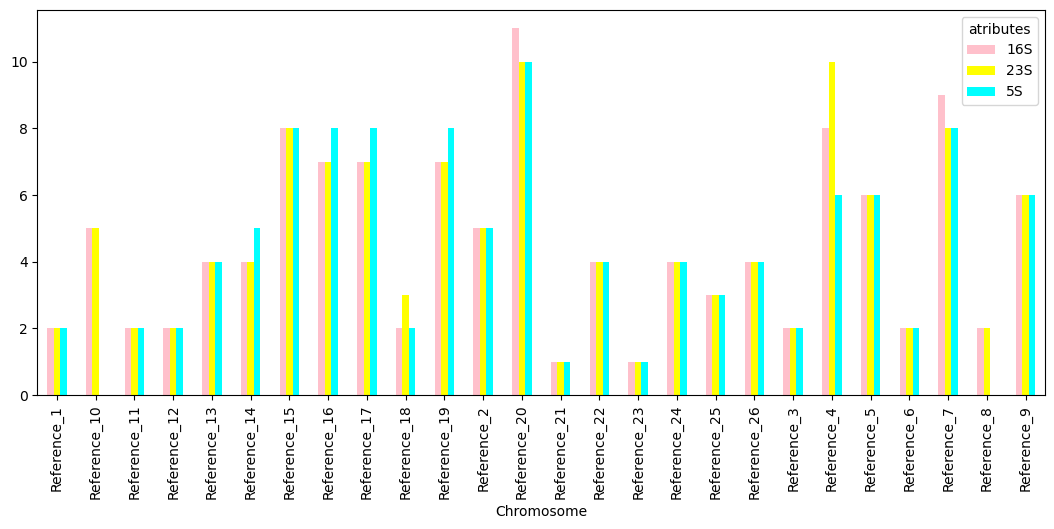

In [84]:
rna_p_chr.unstack().plot.bar(figsize=(13,5), color={'16S':'pink', '23S':'yellow', '5S':'cyan'})

In [86]:
suc_rna = pd.merge(table_gff,table_bed, on="Chromosome", how="outer")
suc_rna[(suc_rna['start_x'] >= suc_rna['start_y']) & (suc_rna['end_x'] <= suc_rna['end_y'])]

,Chromosome,source,type,start_x,end_x,score_x,strand_x,phase,atributes,start_y,end_y,name,score_y,strand_y
129,Reference_11,barrnap:0.9,rRNA,924358,925855,0.000000e+00,+,.,16S,923529,930070,NODE_1081_length_6540_cov_836.773323,0,-
156,Reference_11,barrnap:0.9,rRNA,926697,929642,0.000000e+00,+,.,23S,923529,930070,NODE_1081_length_6540_cov_836.773323,0,-
183,Reference_11,barrnap:0.9,rRNA,929827,929936,1.400000e-12,+,.,5S,923529,930070,NODE_1081_length_6540_cov_836.773323,0,-
215,Reference_11,barrnap:0.9,rRNA,2074460,2075957,0.000000e+00,+,.,16S,2073631,2080172,NODE_1081_length_6540_cov_836.773323,0,-
242,Reference_11,barrnap:0.9,rRNA,2076799,2079744,0.000000e+00,+,.,23S,2073631,2080172,NODE_1081_length_6540_cov_836.773323,0,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121849,Reference_14,barrnap:0.9,rRNA,2433040,2433152,2.000000e-12,-,.,5S,2433027,2433434,NODE_6108_length_407_cov_1153.232955,0,+
122176,Reference_14,barrnap:0.9,rRNA,3766952,3767064,2.000000e-12,-,.,5S,3766939,3767346,NODE_6108_length_407_cov_1153.232955,0,+
122577,Reference_25,barrnap:0.9,rRNA,1329370,1329473,2.900000e-10,-,.,5S,1329345,1329810,NODE_5333_length_465_cov_547.609756,0,-
125054,Reference_25,barrnap:0.9,rRNA,1822913,1823016,2.900000e-10,+,.,5S,1822575,1823040,NODE_5333_length_465_cov_547.609756,0,+
